In [1]:
import random as rd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
%store -r WR_Prospects_2018_Updated
%store -r WR_Prospects_2019_Updated
%store -r WR_Prospects_2020_Updated

In [3]:
# Add All Years Into One (Name, Conference, College, Year, Grade, Round #, Class, H0, H1, H2)
WR_Prospects_Updated = []

for i in range(len(WR_Prospects_2018_Updated)):
    WR_Prospects_Updated.append(WR_Prospects_2018_Updated[i])
for i in range(len(WR_Prospects_2019_Updated)):
    WR_Prospects_Updated.append(WR_Prospects_2019_Updated[i])   
for i in range(len(WR_Prospects_2020_Updated)):
    WR_Prospects_Updated.append(WR_Prospects_2020_Updated[i])  
    
df_cluster = pd.DataFrame(WR_Prospects_Updated, columns = ['Name','Conference','College','Year','Grade','Round','Class','H0','H1','H2'])
df_cluster

,Name,Conference,College,Year,Grade,Round,Class,H0,H1,H2
0,Marcell Ateman,Big 12,Oklahoma State,2018,6.1,7,5,5,0,0
1,Braxton Berrios,ACC,Miami,2018,5.9,6,4,4,0,0
2,Deontay Burnett,Pac 12,USC,2018,5.9,0,3,5,0,0
3,Deon Cain,ACC,Clemson,2018,6.3,6,3,7,0,0
4,Antonio Callaway,SEC,Florida,2018,6.1,4,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...
100,Darrell Stewart,Big 10,Michigan State,2020,5.4,0,5,2,0,0
101,Freddie Swain,SEC,Florida,2020,5.8,6,4,3,0,0
102,Jeff Thomas,ACC,Miami,2020,5.6,0,3,5,0,0
103,Ben Victor,Big 10,Ohio State,2020,5.5,0,4,5,0,0


In [4]:
conference = {'Big 12': 0, 'Big 10': 1, 'Pac 12': 2, 'ACC': 3, 'SEC': 4}
df_cluster.Conference = [conference[item] for item in df_cluster.Conference]

Text(0, 0.5, 'Grade')

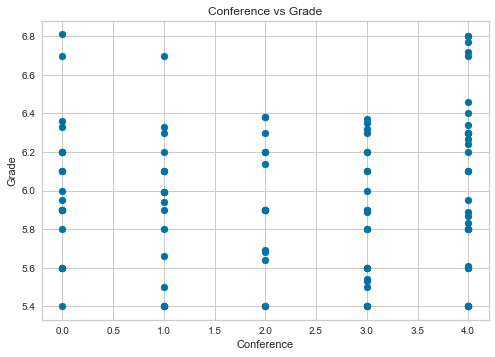

In [5]:
cg_all = df_cluster[['Conference','Grade']].values
plt.scatter(cg_all[:, 0], cg_all[:, 1])
plt.title("Conference vs Grade")
plt.xlabel("Conference")
plt.ylabel("Grade")

Elbow Method for Conference vs Grade


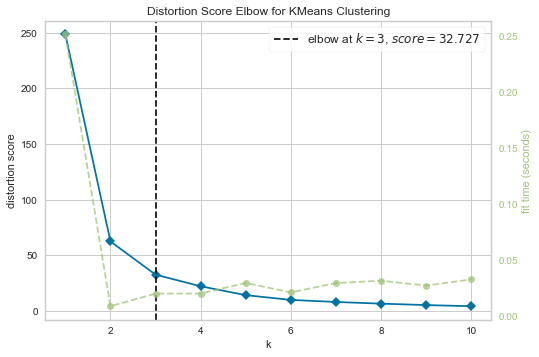

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
print("Elbow Method for Conference vs Grade")
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(cg_all)
visualizer.show()

In [7]:
print("K-Means for Conference vs Grade")
k_means_cg = KMeans(n_clusters = 3).fit(cg_all)
print("Centroids: ")
print(k_means_cg.cluster_centers_)
print("Clusters: ")
print(k_means_cg.labels_)

K-Means for Conference vs Grade
Centroids: 
[[0.45945946 5.97972973]
 [2.60526316 5.88973684]
 [4.         6.07166667]]
Clusters: 
[0 1 1 1 2 1 0 2 0 0 2 0 1 2 0 1 0 1 1 1 0 2 1 1 0 2 1 1 0 1 0 2 1 1 2 0 0
 0 1 0 2 0 2 1 1 0 0 0 2 0 2 1 0 1 1 2 2 0 2 1 0 1 2 1 2 2 0 1 2 2 0 2 1 1
 2 0 1 0 1 1 2 2 2 2 0 1 0 0 2 0 0 1 1 0 1 0 1 2 2 1 0 2 1 0 0]


Text(0, 0.5, 'Grade')

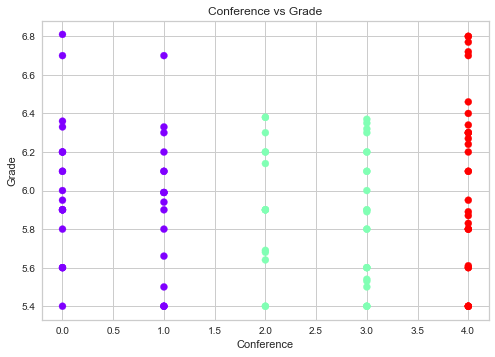

In [8]:
plt.scatter(cg_all[:, 0], cg_all[:, 1], c = k_means_cg.labels_, cmap = 'rainbow')
plt.title("Conference vs Grade")
plt.xlabel("Conference")
plt.ylabel("Grade")

Text(0, 0.5, 'H0')

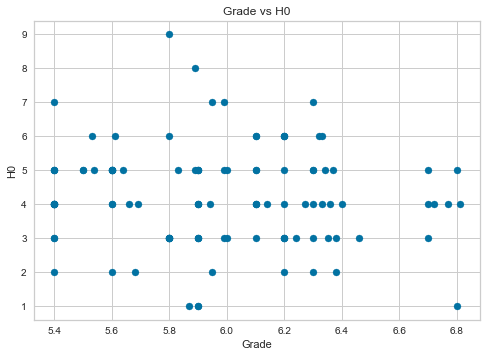

In [9]:
gc_all = df_cluster[['Grade','H0']].values
plt.scatter(gc_all[:, 0], gc_all[:, 1])
plt.title("Grade vs H0")
plt.xlabel("Grade")
plt.ylabel("H0")

In [10]:
for i in range(len(WR_Prospects_Updated)):
    WR_Prospects_Updated[i].append(k_means_cg.labels_[i])

Elbow Method for Grade vs H0


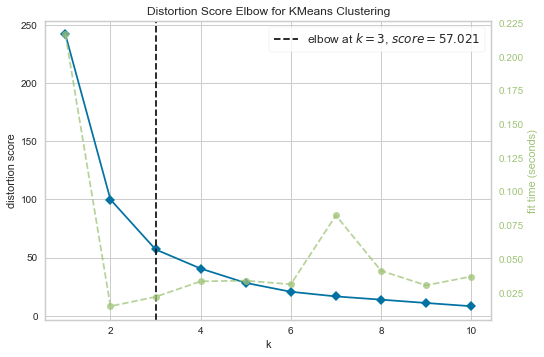

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
print("Elbow Method for Grade vs H0")
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(gc_all)
visualizer.show()

In [12]:
print("K-Means for Grade vs H0")
k_means_gc = KMeans(n_clusters = 3).fit(gc_all)
print("Centroids: ")
print(k_means_gc.cluster_centers_)
print("Clusters: ")
print(k_means_gc.labels_)

K-Means for Grade vs H0
Centroids: 
[[5.94446429 4.5       ]
 [6.01818182 2.54545455]
 [5.9825     6.5625    ]]
Clusters: 
[0 0 0 2 0 0 1 1 1 0 0 0 2 1 0 1 0 0 2 1 0 0 2 0 1 0 1 1 1 1 0 2 1 2 0 1 1
 0 0 0 0 0 0 1 0 0 2 1 1 2 1 1 0 0 2 0 0 0 0 0 1 1 1 0 1 0 2 2 2 2 0 0 0 0
 0 2 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 2 0 0 1 0 2 1 0 1 1 1 0 0 0]


Text(0, 0.5, 'H0')

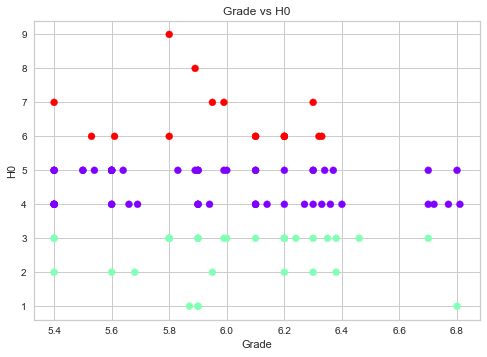

In [13]:
plt.scatter(gc_all[:, 0], gc_all[:, 1], c = k_means_gc.labels_, cmap = 'rainbow')
plt.title("Grade vs H0")
plt.xlabel("Grade")
plt.ylabel("H0")

In [14]:
for i in range(len(WR_Prospects_Updated)):
    WR_Prospects_Updated[i].append(k_means_gc.labels_[i])

Text(0, 0.5, 'Grade')

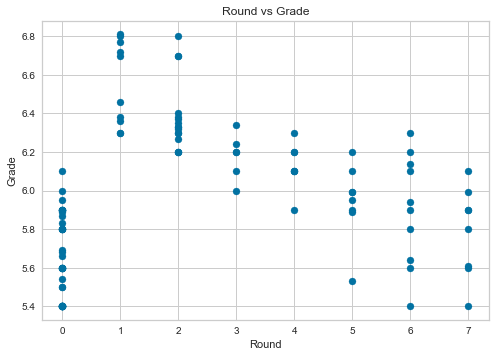

In [15]:
rg_all = df_cluster[['Round','Grade']].values
plt.scatter(rg_all[:, 0], rg_all[:, 1])
plt.title("Round vs Grade")
plt.xlabel("Round")
plt.ylabel("Grade")

Text(0, 0.5, 'H0')

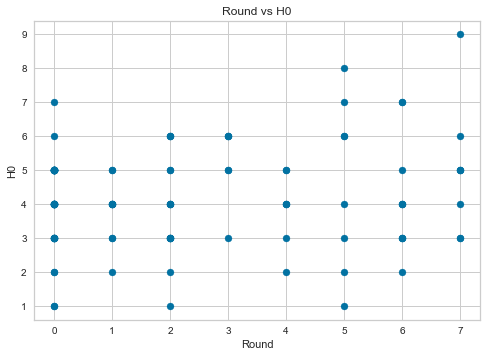

In [16]:
rh_all = df_cluster[['Round','H0']].values
plt.scatter(rh_all[:, 0], rh_all[:, 1])
plt.title("Round vs H0")
plt.xlabel("Round")
plt.ylabel("H0")

In [17]:
%store WR_Prospects_Updated
del WR_Prospects_Updated

Stored 'WR_Prospects_Updated' (list)
